Machine Learning Engineer Nanodegree
Model Evaluation & Validation
#Project 1: Predicting Boston Housing Prices

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print(housing_features.shape)
print(housing_prices.shape)
print ("Boston Housing dataset loaded successfully!")

(506, 13)
(506,)
Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, I will quickly investigate a few basic statistics about the dataset I am working with. In addition, I will look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. 

In [2]:
# Number of houses in the dataset
total_houses = housing_prices.size

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print ("Boston Housing dataset statistics (in $1000's):\n")
print ("Total number of houses:", total_houses)
print ("Total number of features:", total_features)
print ("Minimum house price:", minimum_price)
print ("Maximum house price:", maximum_price)
print ("Mean house price: {0:.3f}".format(mean_price))
print ("Median house price:", median_price)
print ("Standard deviation of house price: {0:.3f}".format(std_dev))

Boston Housing dataset statistics (in $1000's):

('Total number of houses:', 506)
('Total number of features:', 13)
('Minimum house price:', 5.0)
('Maximum house price:', 50.0)
Mean house price: 22.533
('Median house price:', 21.199999999999999)
Standard deviation of house price: 9.188


Referring to the CLIENT_FEATURES:
The average number of rooms per house(RM) - 5.609,
Per capita crime rate by town (CRIM) - 11.95,
Nitric oxides concentration per 10 million(NOX) - 0.659

# Evaluating Model Performance


In the code block below, I randomly shuffled the input data `X` and target labels (housing values) `y`.  Then I split the data into training and testing subsets, holding 30% of the data for testing.  The dataset is relatively small and so no validation set was created.

In [3]:
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.3, random_state = 42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print ("Successfully shuffled and split the data!")
except:
    print ("Something went wrong with shuffling and splitting the data.")

Successfully shuffled and split the data!



We split the data so as to prevent the model from simply memorizing the labels rather than actually learning from them.  If we train the model using all our data, the model will be biased and not be able to accurately make predictions on unseen data.  Reserving a portion of the dataset for testing would give the model some unseen data and this should reduce any bias from the model's predictions.  

In [5]:
from sklearn.metrics import mean_absolute_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_absolute_error(y_true, y_predict)
    return error

# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print ("Successfully performed a metric calculation!")
except:
    print ("Something went wrong with performing a metric calculation.")

Successfully performed a metric calculation!


#### Why I chose to use the mean absolute error vs mean squared error for predicting housing prices and analyzing the total error

The mean absolute error (MAE) would be the most appropriate metric for this problem . I think the MAE would be the preferred choice over the MSE because it is less sensitive to errors and outliers in the dataset. I took note of the max and minimum house prices and it's clear that they could potentially reduce the model's accuracy if the MSE were used.

In the code block below, I used the `fit_model` function does the following:
- Create a scoring function using the MAE
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).


In [6]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_absolute_error, greater_is_better=False)
    
    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring_function)
    
    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)
    
    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")

Successfully fit a model!


### What is the grid search algorithm and when is it applicable?

The grid search algorithm exhaustively works through various combinations of parameters to find which parameter tune gives the best performance.  It can be very useful in cases where a lot of parameters need to be tested or when a parameter could be set to a wide range of values

### What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?

Cross-validation (CV) trains the model on k - 1 folds, k times where 1 fold is used for testing.  The CV is calculated and then averaged at the end of the process.  CV would be used to automate the parameter selection and pick out a combination of parameters that yields the best performance.  CV helps with the grid search to reduce the chance of accidentally overfitting the model. 

In [8]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))
    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [9]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\Home\Anaconda2\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


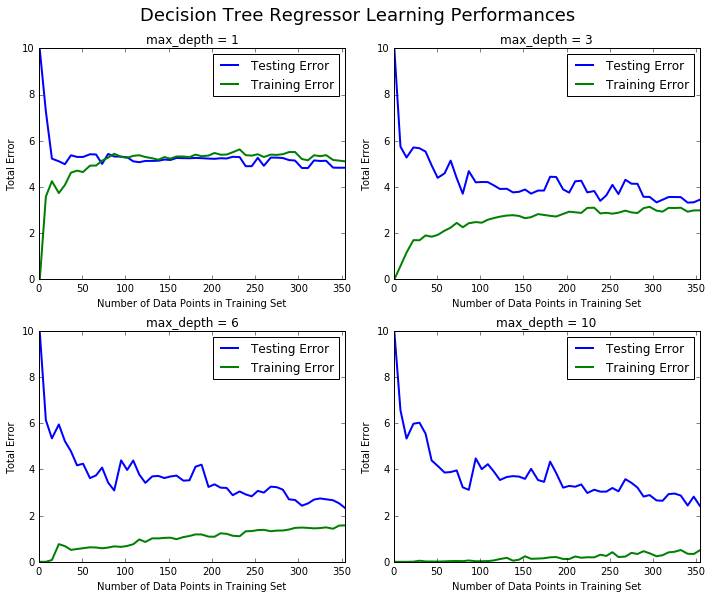

In [10]:
learning_curves(X_train, y_train, X_test, y_test)

Looking at the learning graphs above, The model with max depth of 1 suffers from a high bias. The training and testing errors are comparatively higher in this graph than the others and the training and testing errors converge even when not much data is being fitted to the model.  The model with a max depth of 10 suffers from high variance, as seen by the large gap between the training and testing errors. The training error remains very low, as opposed to the testing error, which remains high and also decreases slowly as the training set size increases.  

Creating a model complexity graph. . . 


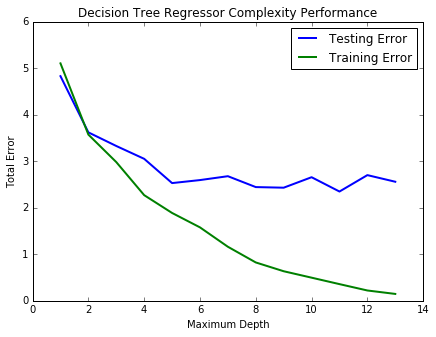

In [34]:
model_complexity(X_train, y_train, X_test, y_test)

In the model complexity graph, the gap between the training and test errors widens as the depth increases.  Although a max depth of 10 works, it could potentially lead to overfitting and high variance.  Based on looking at the graph, I would choose a max depth of 5 to generalize the dataset.  At this point, the model would have enough flexibility to make generalized predictions about future data with the reduced effects of bias and variance. 

# Model Prediction
In this final section of the project, I made a prediction on the client's feature set using an optimized model from `fit_model`. 

In [14]:
print "Using grid search, we can see that the final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Using grid search, we can see that the final model has an optimal max_depth parameter of 5


In [15]:
sale_price = reg.predict(CLIENT_FEATURES)
print ("Predicted value of client's home: {0:.3f}".format(sale_price[0]))

Predicted value of client's home: 20.968


The best selling price for the client's home is $20,714.00. This prices falls slightly below the average price of houses sold in the Greater Boston area.    

The model used in this project demonstrated the ability to value the client's house and came up with a value that fell in line with the average prices of other houses sold in the Greater Boston area.  The model was able to learn all it could from the data with a max depth of 5,  as shown by the plateau in the training and testing errors on the learning curve after that point.  Having fine tuned the model, I would use it to predict the selling price of future client's homes in the area.  